In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import helper
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
! pip install joblib

In [3]:
tf.__version__

'2.8.0'

In [4]:
helper.unzip_data("archive.zip")

In [5]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is AA66-8B4D

 Directory of C:\Users\semen\Desktop\ECG

17.07.2022  00:20    <DIR>          .
17.07.2022  00:20    <DIR>          ..
16.07.2022  15:26    <DIR>          .ipynb_checkpoints
16.07.2022  15:27       103ÿ633ÿ768 archive.zip
17.07.2022  00:20           402ÿ165 ECG_Heartbeat_Categorization.ipynb
16.07.2022  22:46             1ÿ147 helper.py
17.07.2022  00:21       102ÿ892ÿ400 mitbih_test.csv
17.07.2022  00:21       411ÿ503ÿ800 mitbih_train.csv
17.07.2022  00:21        49ÿ378ÿ200 ptbdb_abnormal.csv
17.07.2022  00:21        19ÿ016ÿ200 ptbdb_normal.csv
17.07.2022  00:21    <DIR>          __pycache__
               7 File(s)    686ÿ827ÿ680 bytes
               4 Dir(s)  298ÿ249ÿ936ÿ896 bytes free


In [6]:
train_data = pd.read_csv("mitbih_train.csv")
test_data = pd.read_csv("mitbih_test.csv")
ptbdb_abnormal_data = pd.read_csv("ptbdb_abnormal.csv")
ptbdb_normal_data = pd.read_csv("ptbdb_normal.csv")

In [7]:
test_data = pd.read_csv("mitbih_test.csv")

In [8]:
train_data

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [9]:
train_data_full = train_data.iloc[62500:, :]
train_data_full

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
62500,0.429078,0.000000,0.088652,0.265957,0.351064,0.361702,0.368794,0.386525,0.386525,0.379433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62501,0.923664,0.797710,0.500000,0.354962,0.337786,0.282443,0.234733,0.190840,0.166031,0.112595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62502,0.935897,0.887179,0.374359,0.000000,0.087179,0.094872,0.056410,0.053846,0.048718,0.041026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62503,0.855895,0.834061,0.475983,0.165939,0.104803,0.139738,0.117904,0.087336,0.078603,0.061135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62504,1.000000,0.732804,0.256614,0.044974,0.074074,0.071429,0.034392,0.023810,0.021164,0.029101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [10]:
test_data

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21887,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [11]:
ptbdb_abnormal_data

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10501,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
ptbdb_normal_data

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4041,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data_distribution = train_data_full.iloc[:, -1].value_counts()
data_distribution

0.0    9970
4.0    6431
2.0    5788
1.0    2223
3.0     641
Name: 0.000000000000000000e+00.88, dtype: int64

In [14]:
train_data_full.iloc[0].to_list()

[0.4290780127048493,
 0.0,
 0.08865248411893843,
 0.26595744490623474,
 0.3510638177394867,
 0.3617021143436432,
 0.368794322013855,
 0.38652482628822327,
 0.38652482628822327,
 0.3794326186180114,
 0.390070915222168,
 0.40780141949653625,
 0.41134750843048096,
 0.4042553305625916,
 0.40780141949653625,
 0.436170220375061,
 0.4255319237709045,
 0.4219858050346375,
 0.44680851697921753,
 0.46808511018753046,
 0.4751773178577423,
 0.457446813583374,
 0.4858156144618988,
 0.521276593208313,
 0.5248227119445801,
 0.5390070676803589,
 0.5567376017570496,
 0.6170212626457214,
 0.652482271194458,
 0.6631205677986145,
 0.716312050819397,
 0.7482269406318665,
 0.7588652372360228,
 0.7765957713127136,
 0.7978723645210266,
 0.8191489577293397,
 0.7907801270484924,
 0.7411347627639769,
 0.6914893388748169,
 0.652482271194458,
 0.5780141949653625,
 0.5070921778678894,
 0.46453902125358576,
 0.44680851697921753,
 0.414893627166748,
 0.390070915222168,
 0.390070915222168,
 0.40070921182632446,
 0.393

In [15]:
len(train_data_full.iloc[0].to_list())

188

# Target distribution

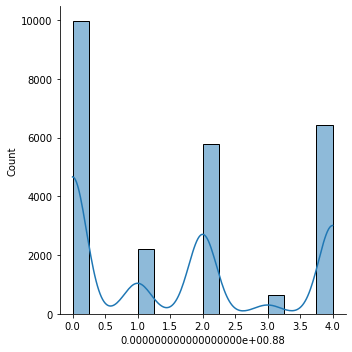

In [16]:
sns.displot(train_data_full.iloc[:, -1], bins=16, kde=True)

# Plot some examples

In [17]:
def plot_ECG_examples(df):
    for m in range(3):
        i = random.choice(range(df.shape[0]))
        to_plot = df.iloc[i ,:-1]
        class_number = df.iloc[i , -1]
        plt.figure(figsize=(17, 10))
        plt.plot(range(187), to_plot, alpha=0.9)
        plt.title(f"Class: {class_number}, number {i}")
        plt.show()

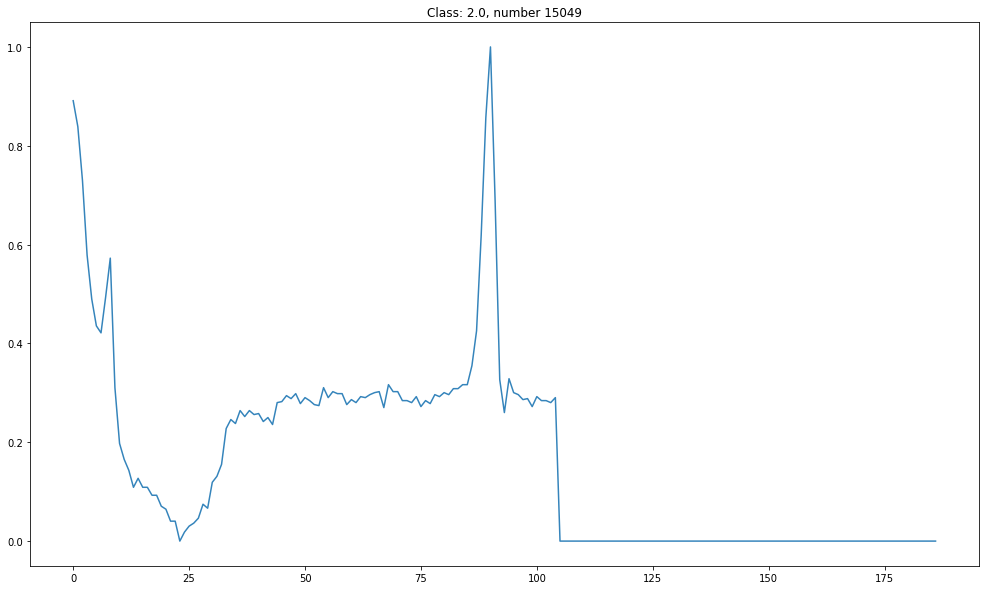

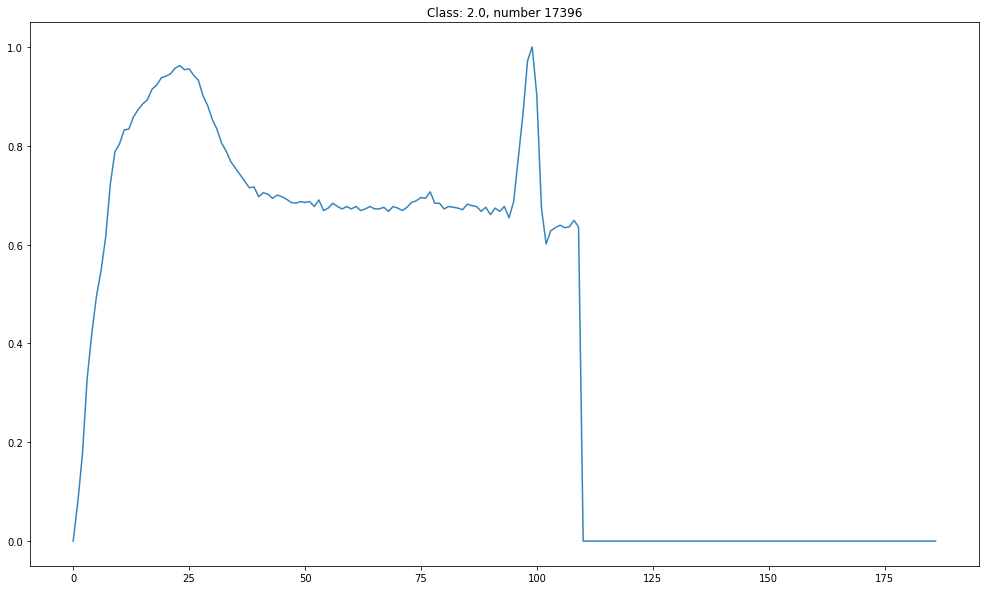

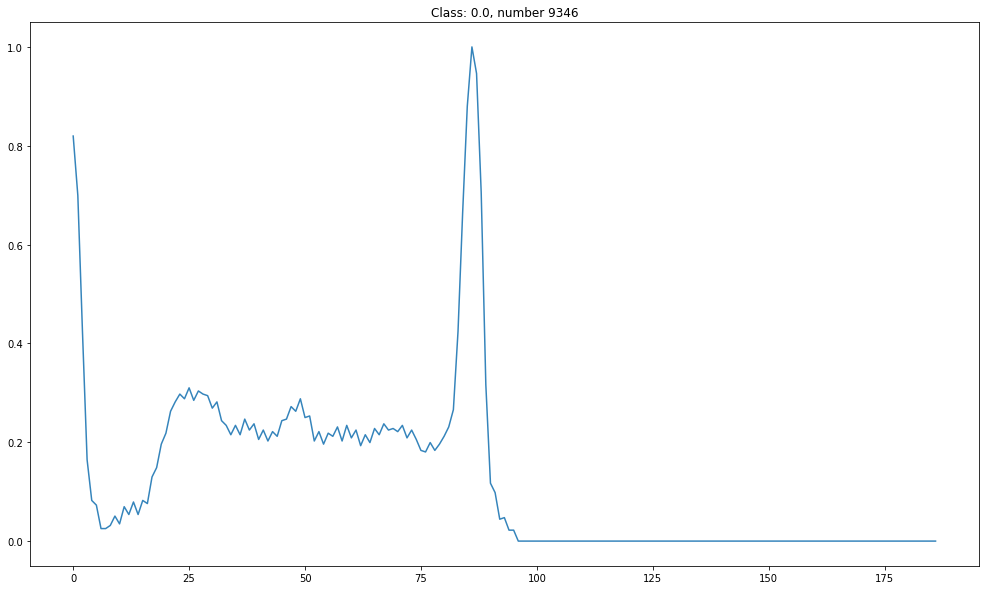

In [18]:
plot_ECG_examples(df=train_data_full)

# Data preparation

Shuffle the data 


In [19]:
train_data_full = train_data_full.sample(frac=1)
train_data = train_data_full.iloc[5000:, : ]
validation_data = train_data_full.iloc[:5000, : ]
train_data

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
74177,0.952174,0.930435,0.295652,0.000000,0.052174,0.134783,0.082609,0.065217,0.169565,0.191304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73141,0.923885,0.787402,0.091864,0.020997,0.223097,0.293963,0.325459,0.312336,0.341207,0.328084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
62884,0.978984,0.898424,0.500876,0.164623,0.187391,0.211909,0.189142,0.171629,0.166375,0.155867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79860,0.962373,0.884226,0.571635,0.373372,0.315485,0.289436,0.269175,0.264834,0.253256,0.241679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
86282,0.930365,0.886986,0.824201,0.763699,0.681507,0.584475,0.466895,0.353881,0.232877,0.184932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78594,0.935754,0.912011,0.634078,0.392458,0.315642,0.296089,0.282123,0.258380,0.238827,0.229050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
84647,0.904171,0.837655,0.790304,0.697858,0.603157,0.468997,0.312289,0.182638,0.118377,0.087937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
80970,0.849341,0.945386,1.000000,0.760829,0.395480,0.227872,0.139360,0.124294,0.097928,0.094162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
63524,1.000000,0.648045,0.094972,0.036313,0.025140,0.027933,0.013966,0.025140,0.000000,0.013966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
test_data

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21887,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [21]:
train_data.iloc[: , -1]

74177    1.0
73141    1.0
62884    0.0
79860    2.0
86282    4.0
        ... 
78594    2.0
84647    4.0
80970    3.0
63524    0.0
75392    2.0
Name: 0.000000000000000000e+00.88, Length: 20053, dtype: float64

In [22]:
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_data.iloc[: , -1].to_numpy().reshape(-1, 1))
validation_data_one_hot = one_hot_encoder.fit_transform(validation_data.iloc[: , -1].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_data.iloc[: , -1].to_numpy().reshape(-1, 1))
train_labels_one_hot, train_labels_one_hot.shape, validation_data_one_hot, validation_data_one_hot.shape

(array([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.]]),
 (20053, 5),
 array([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]),
 (5000, 5))

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


train_labels_encoded = label_encoder.fit_transform(train_data.iloc[: , -1].to_numpy())
validation_labels_encoded = label_encoder.fit_transform(validation_data.iloc[: , -1].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_data.iloc[: , -1].to_numpy())

# Check what training labels look like
train_labels_encoded, validation_labels_encoded


(array([1, 1, 0, ..., 3, 0, 2], dtype=int64),
 array([0, 2, 4, ..., 2, 0, 0], dtype=int64))

In [24]:
train_data = train_data.iloc[:,:-1]
validation_data = validation_data.iloc[:,:-1]
test_data = test_data.iloc[:,:-1]
train_data

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.78,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87
74177,0.952174,0.930435,0.295652,0.000000,0.052174,0.134783,0.082609,0.065217,0.169565,0.191304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73141,0.923885,0.787402,0.091864,0.020997,0.223097,0.293963,0.325459,0.312336,0.341207,0.328084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62884,0.978984,0.898424,0.500876,0.164623,0.187391,0.211909,0.189142,0.171629,0.166375,0.155867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79860,0.962373,0.884226,0.571635,0.373372,0.315485,0.289436,0.269175,0.264834,0.253256,0.241679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86282,0.930365,0.886986,0.824201,0.763699,0.681507,0.584475,0.466895,0.353881,0.232877,0.184932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78594,0.935754,0.912011,0.634078,0.392458,0.315642,0.296089,0.282123,0.258380,0.238827,0.229050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84647,0.904171,0.837655,0.790304,0.697858,0.603157,0.468997,0.312289,0.182638,0.118377,0.087937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80970,0.849341,0.945386,1.000000,0.760829,0.395480,0.227872,0.139360,0.124294,0.097928,0.094162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63524,1.000000,0.648045,0.094972,0.036313,0.025140,0.027933,0.013966,0.025140,0.000000,0.013966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Base model

In [25]:

inputs = layers.Input(shape=(187))
# x = layers.BatchNormalization()(inputs)
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
x = layers.LSTM(128, activation="relu")(x)
outputs = layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='model')

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 187)]             0         
                                                                 
 dense (Dense)               (None, 128)               24064     
                                                                 
 lambda (Lambda)             (None, 1, 128)            0         
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 156,293
Trainable params: 156,293
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit the model
model_history = model.fit(train_data,
                              train_labels_one_hot,
                              epochs=50,
                              validation_data=(validation_data, validation_data_one_hot),
                              callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                                        verbose=1,
                                                                        patience=5))

Epoch 1/50
627/627 [==============================] - 7s 8ms/step - loss: 0.6242 - accuracy: 0.7817 - val_loss: 0.3984 - val_accuracy: 0.8656
Epoch 2/50
627/627 [==============================] - 6s 9ms/step - loss: 0.3817 - accuracy: 0.8685 - val_loss: 0.3449 - val_accuracy: 0.8800
Epoch 3/50
627/627 [==============================] - 6s 10ms/step - loss: 0.3145 - accuracy: 0.8917 - val_loss: 0.2967 - val_accuracy: 0.9010
Epoch 4/50
627/627 [==============================] - 6s 10ms/step - loss: 0.2803 - accuracy: 0.9058 - val_loss: 0.2956 - val_accuracy: 0.8970
Epoch 5/50
627/627 [==============================] - 6s 10ms/step - loss: 0.2570 - accuracy: 0.9127 - val_loss: 0.2700 - val_accuracy: 0.9130
Epoch 6/50
627/627 [==============================] - 6s 10ms/step - loss: 0.2375 - accuracy: 0.9202 - val_loss: 0.2408 - val_accuracy: 0.9240
Epoch 7/50
627/627 [==============================] - 6s 10ms/step - loss: 0.2193 - accuracy: 0.9261 - val_loss: 0.2319 - val_accuracy: 0.9256
E

In [27]:

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.

    Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure(figsize=(10,7))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure(figsize=(10,7))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

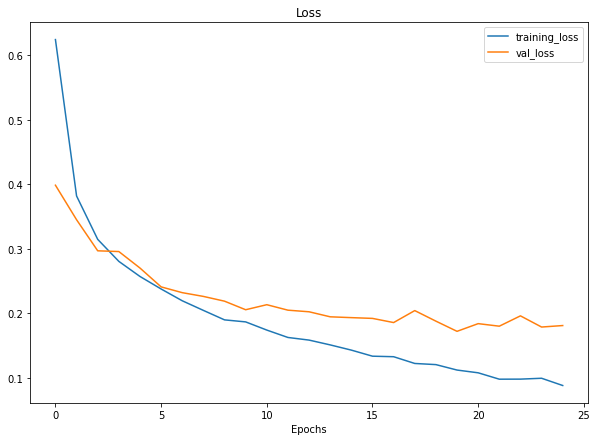

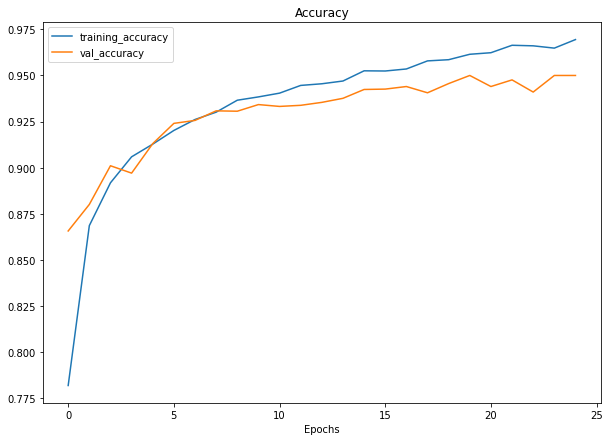

In [28]:
plot_loss_curves(model_history)

In [29]:
# Evaluate on the whole validation dataset
model.evaluate(validation_data, validation_data_one_hot)

157/157 [==============================] - 1s 3ms/step - loss: 0.1809 - accuracy: 0.9500


[0.18086525797843933, 0.949999988079071]

In [32]:
model.evaluate(test_data, test_labels_one_hot)

685/685 [==============================] - 3s 4ms/step - loss: 0.1263 - accuracy: 0.9648


[0.12627121806144714, 0.9647800326347351]

In [30]:
test_data

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.55,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21887,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
